# Concepto de filtros pasa baja con aproximación Chebyshev

In [3]:
#NOTE importar bibliotecas
import sympy as sym

import numpy             as np
import matplotlib.pyplot as plt

from scipy import signal


Se define con la función de transferencia
    $$\left |H \right |^2 = \dfrac{1}{ 1+\epsilon^2 T_N^2 \left (\dfrac{\Omega}{\Omega_p}\right) }$$

donde $T_N$ es el polinomio de Chebyshev. El polinomio $n$-ésimo orden se calcula con la siguiente regla recursiva
    $$T_{N+1}(\omega) = 2\omega T_N(\omega) - T_{N-1}(\omega)$$

In [99]:
def cheby_poly(n,N,Tn,Tnp,X):
    Tnx = 0
    if n < N-1:
        Tnx = 2*w*Tn - Tnp
        cheby_poly(n+1,N,Tnx,Tn,X)
        X.append(Tnx)

In [132]:
X               = []
w, Tn, Tnx, Tnp = sym.symbols('w Tn Tnx Tnp')

Tnp = 1
Tn  = w

cheby_poly(0,4,Tn,Tnp,X)
X[0].expand()

8*w**4 - 8*w**2 + 1

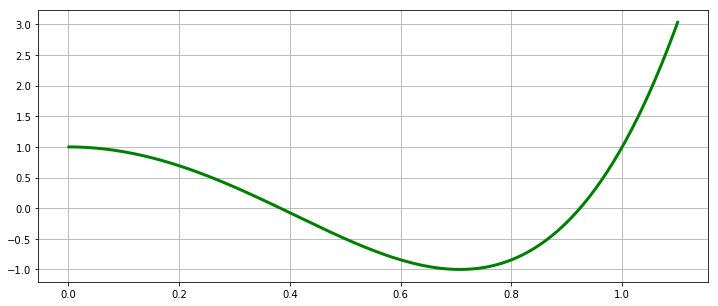

In [133]:
wt  = np.linspace(0.001,1.1,200)
tn = np.array(  [ X[0].subs({'w':i}) for i in wt ]   )

plt.figure(figsize=(12,5))
plt.plot(wt,tn,color='green',linewidth=3)
plt.grid(True)

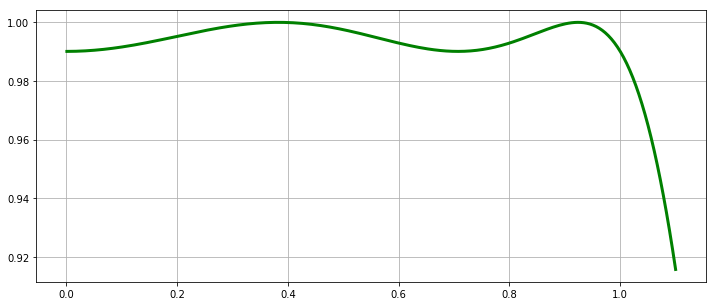

In [138]:
eps = 0.1

H = 1/(1 + (eps*tn)**2 )

plt.figure(figsize=(12,5))
plt.plot(wt,H,color='green',linewidth=3)
plt.grid(True)

In [171]:
N   = 5
eps = .1

k = np.arange(1,N+1)

sg_k = -np.sin( (2*k-1.)*np.pi/(2*N) )*np.sinh( 1./N*np.arcsinh(1./eps) )
w_k  =  np.cos( (2*k-1.)*np.pi/(2*N) )*np.cosh( 1./N*np.arcsinh(1./eps) )

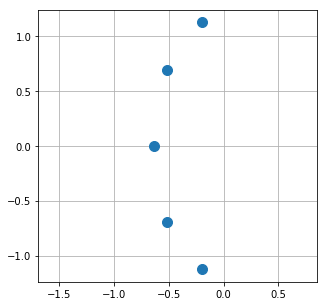

In [172]:
plt.figure(figsize=(5,5))
plt.plot(sg_k,w_k,'o',markersize=10)
plt.grid(True)
plt.axes().set_aspect('equal', 'datalim')

In [187]:
l = int(sg_k.shape[0]/2)
B = -2*sg_k
W = sg_k**2 + w_k**2

for i,j in zip(B,W):
    print ('S**2 +{:5.4f} S + {:5.4f}'.format(i,j))

S**2 +0.3932 S + 1.3093
S**2 +1.0294 S + 0.7503
S**2 +1.2725 S + 0.4048
S**2 +1.0294 S + 0.7503
S**2 +0.3932 S + 1.3093


r0=1.0812, r1=0.4112


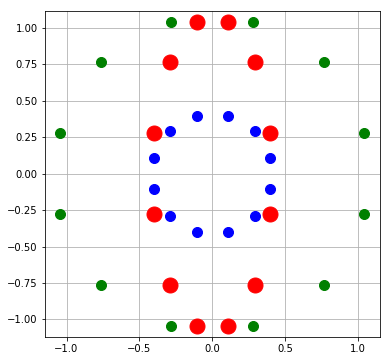

In [237]:
n   = 6
k   = np.arange(1,2*n+1)
eps = .1

G = (  1 + np.sqrt( 1 + eps**2 )/eps  )
G = G**(1./n)

r0 = ( G**2 + 1 )/(2*G)
r1 = ( G**2 - 1 )/(2*G)

print ('r0={:6.4f}, r1={:6.4f}'.format(r0,r1))

p  = np.pi*(2*k + n - 1 )/(2*n)

plt.figure(figsize=(6,6))
plt.plot(  r1*np.cos(p),r0*np.sin(p),'ro',markersize=15 )
#plt.plot( -r1*np.sin(p),r0*np.cos(p),'ko',markersize=9 )
plt.plot(  r0*np.cos(p),r0*np.sin(p),'go',markersize=10 )
plt.plot(  r1*np.cos(p),r1*np.sin(p),'bo',markersize=10 )
plt.axes().set_aspect('equal', 'datalim')
plt.grid(True)
plt.show() 

In [268]:
n   = 8
k   = np.arange(1,n+1)
eps = .01

G = (  1 + np.sqrt( 1 + eps**2 )/eps  )
G = G**(1./n)

r0 = ( G**2 + 1 )/(2*G)
r1 = ( G**2 - 1 )/(2*G)

p  = np.pi*(2*k + n - 1 )/(2*n)

S = sym.symbols('S')

A, B = r1*np.cos(p),r0*np.sin(p)
Pk   = []
l    = int( n/2 )
for i,j in zip( A[:l],B[:l] ):
    pk = (S -i-1j*j)*(S -i+1j*j)
    Pk.append(pk)
    print ( pk ).expand()

if n%2!=0:
    print ('polo real: {:6.4f}'.format( -A[l]) )
    Pk.append(S-A[l])


S**2 + 0.237788719047078*S + 1.33334759368678
S**2 + 0.677164980226423*S + 1.06274954361368
S**2 + 1.01344901168213*S + 0.680066111248588
S**2 + 1.1954446180474*S + 0.40946806117549


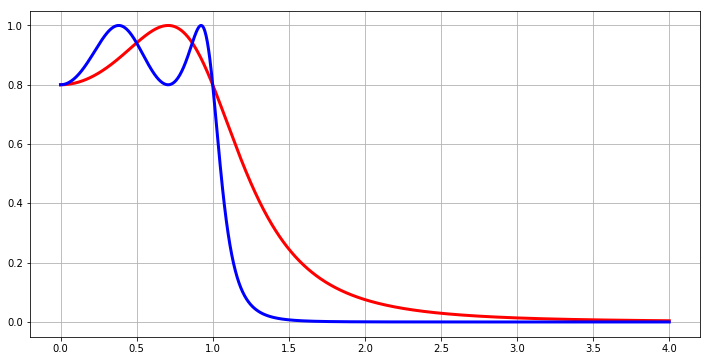

In [207]:
w  = np.linspace( 0,4,1000 )
p2 = 2*w**2 - 1
p4 = 8*w**4 - 8*w**2 + 1
e = .5

H2 = 1/( 1+e**2*p2**2 )
H4 = 1/( 1+e**2*p4**2 )

plt.figure(figsize=(12,6))
plt.plot( w,H2, 'r', linewidth=3 )
plt.plot( w,H4, 'b', linewidth=3 )
plt.grid(True)
plt.show()

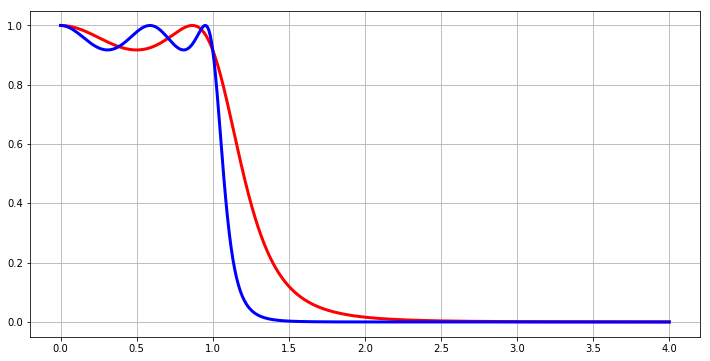

In [208]:
w  = np.linspace( 0,4,1000 )
p3 = 4*w**3  - 3*w
p5 = 16*w**5 - 20*w**3 + 5*w
e = .3

H3 = 1/( 1+e**2*p3**2 )
H5 = 1/( 1+e**2*p5**2 )

plt.figure(figsize=(12,6))
plt.plot( w,H3, 'r', linewidth=3 )
plt.plot( w,H5, 'b', linewidth=3 )
plt.grid(True)
plt.show()

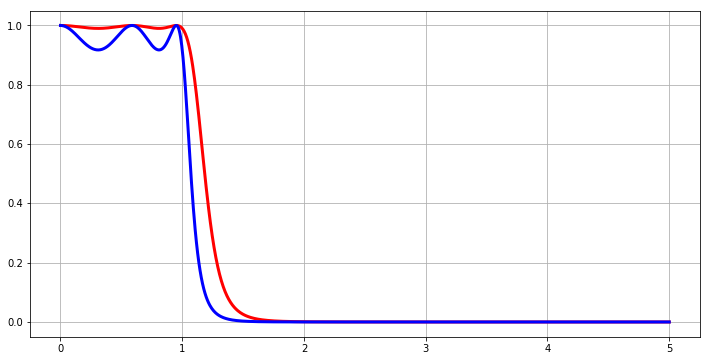

In [229]:
w  = np.linspace( 0.0001,5,1000 )
wt = w
p5 = 16*wt**5 - 20*wt**3 + 5*wt
e1 = .1
e2 = .3

H5_1 = 1/( 1+e1**2*p5**2 )
H5_2 = 1/( 1+e2**2*p5**2 )

plt.figure(figsize=(12,6))
plt.plot( w,H5_1, 'r', linewidth=3 )
plt.plot( w,H5_2, 'b', linewidth=3 )
plt.grid(True)
plt.show()